## Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
#from sklearn.test import train_test_split

In [2]:
Df = datasets.load_diabetes() # 당뇨병 데이터셋
print(Df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
dir(Df)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'target',
 'target_filename']

In [4]:
Df.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
Df.data_filename

'C:\\Users\\0114m\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [6]:
Df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
Df.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
Df.target_filename

'C:\\Users\\0114m\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_target.csv.gz'

In [9]:
X = pd.DataFrame(Df.data, columns=Df.feature_names)
print(X.shape)
display(X.head())
display(X.tail())

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [10]:
y = pd.DataFrame(Df.target, columns={'sol'})
print(y.shape)
display(y.head())
display(y.tail())

(442, 1)


,sol
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


,sol
437,178.0
438,104.0
439,132.0
440,220.0
441,57.0


In [11]:
X_bmi = X[:]['bmi']
print(X_bmi)
print('-'*50)
print(X_bmi[422:442])

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
5     -0.040696
6     -0.047163
7     -0.001895
8      0.061696
9      0.039062
10    -0.083808
11     0.017506
12    -0.028840
13    -0.001895
14    -0.025607
15    -0.018062
16     0.042296
17     0.012117
18    -0.010517
19    -0.018062
20    -0.056863
21    -0.022373
22    -0.004050
23     0.060618
24     0.035829
25    -0.012673
26    -0.077342
27     0.059541
28    -0.021295
29    -0.006206
         ...   
412    0.085408
413   -0.000817
414    0.006728
415    0.008883
416    0.080019
417    0.071397
418   -0.024529
419   -0.054707
420   -0.036385
421    0.016428
422    0.077863
423   -0.039618
424    0.011039
425   -0.040696
426   -0.034229
427    0.005650
428    0.088642
429   -0.033151
430   -0.056863
431   -0.030996
432    0.055229
433   -0.060097
434    0.001339
435   -0.023451
436   -0.074108
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, 

In [12]:
X_train = X[:-20]['bmi']
X_test = X[-20:]['bmi']
print(X_train)
print('-'*50)
print(X_test)

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
5     -0.040696
6     -0.047163
7     -0.001895
8      0.061696
9      0.039062
10    -0.083808
11     0.017506
12    -0.028840
13    -0.001895
14    -0.025607
15    -0.018062
16     0.042296
17     0.012117
18    -0.010517
19    -0.018062
20    -0.056863
21    -0.022373
22    -0.004050
23     0.060618
24     0.035829
25    -0.012673
26    -0.077342
27     0.059541
28    -0.021295
29    -0.006206
         ...   
392   -0.029918
393   -0.046085
394    0.018584
395    0.001339
396   -0.030996
397   -0.004050
398    0.015350
399    0.022895
400    0.045529
401   -0.045007
402   -0.033151
403    0.097264
404    0.054152
405    0.123131
406   -0.080575
407    0.092953
408   -0.050396
409   -0.011595
410   -0.027762
411    0.058463
412    0.085408
413   -0.000817
414    0.006728
415    0.008883
416    0.080019
417    0.071397
418   -0.024529
419   -0.054707
420   -0.036385
421    0.016428
Name: bmi, Length: 422, 

In [13]:
y

,sol
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


In [14]:
y_train = y[:-20]
print(y_train.shape)
display(y_train)
print('-'*50)

y_test = y[-20:]
print(y_test.shape)
display(y_test)

(422, 1)


,sol
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
5,97.0
6,138.0
7,63.0
8,110.0
9,310.0


--------------------------------------------------
(20, 1)


,sol
422,233.0
423,91.0
424,111.0
425,152.0
426,120.0
427,67.0
428,310.0
429,94.0
430,183.0
431,66.0


In [15]:
print(X_train.shape)
print(y_train.shape)

(422,)
(422, 1)


In [16]:
print(dir(np))

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'MachAr', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__doc__', '__file__', '__git_revision__', '__loader__', '__mkl_version__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_add_newdoc_ufunc', '_arg', '_distributor_init', '_globals', '_mat', '_mklinit', '_pytestteste

In [17]:
regr = LinearRegression()

In [18]:
regr.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regr.coef_ # 베타0?1?

array([[938.23786125]])

In [20]:
regr.intercept_ # 베타0?1?

array([152.91886183])

NameError: name 'predict' is not defined

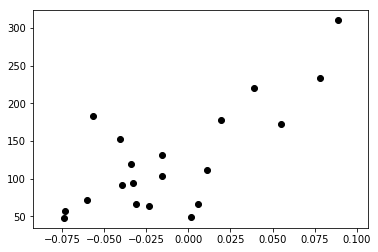

In [53]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, regr, predict(np.array(X_test).reshape(-1,1)), color='b')
plt.show()

## 2 KNN

In [54]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [55]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [56]:
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [57]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [63]:
iris.data.shape

(150, 4)

In [74]:
X = iris.data[:, :2]
y = iris.target
print(X.shape, y.shape)
print(X[:5])
print('-'*15)
print(y[:5])

(150, 2) (150,)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
---------------
[0 0 0 0 0]


In [ ]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)

In [77]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)
print(X[:5])
print('-'*15)
print(y[:5])

[[6.7 3.1]
 [4.9 3. ]
 [5.9 3. ]
 [7.2 3.6]
 [5.7 3.8]]
---------------
[1 0 2 2 0]


In [78]:
X_train = X[:-20]
X_test = X[-20:]

In [79]:
y_train = y[:-20]
y_test = y[-20:]

In [80]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [81]:
Z = clf.predict(X_test)
Z

array([0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 1])

In [82]:
y_test

array([0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2])

In [83]:
[Z == y_test]

[array([ True, False,  True,  True,  True, False,  True, False, False,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False, False])]

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Z)

0.65

In [ ]:
x_min, x_max = X['min max'.format]

In [ ]:
xx = np.arange(x_min, x_max, 0.02)
yy = np.arange(y_min, y_max, 0.02)
xx.shape, yy.shape

In [ ]:
xx, yy = np.meshgrid(xx,yy)
xx.shape, yy.shape

In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)

In [85]:
n_neighbors = 20
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # '#FF000', '#00FF00', '#0000FF'
plt.figure()
plt.scatter(xx, yy, c=Z, cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
plt.show()

NameError: name 'ListedColormap' is not defined

## 3 Decision Tree

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [97]:
iris = datasets.load_iris()

In [ ]:
X = pd.DatFrame()
y = pd.DatFrame()

In [96]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)
print(X.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [88]:
y['y'].value_counts()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [89]:
X_train = X[:100]
X_test = y[100:]

In [90]:
y_train = y[:100]
y_test = y[100:] # train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [91]:
clf = DecisionTreeClassifier(random_state=77, max_depth=4)

NameError: name 'DecisionTreeClassifier' is not defined

In [92]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [93]:
y_pred = clf.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[2 0 1 0 1 0 1 1 0 0 0 2 1 0 1 0 1 2 0 0 2 2 2 0 1 1 0 1 1 2 0 0 0 2 1 2 0
 2 0 0 0 0 2 1 2 1 1 2 1 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [98]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names,
                  class_names=iris.target_names, filled=True)

AttributeError: module 'sklearn.tree' has no attribute 'plot_tree'

<Figure size 1800x1440 with 0 Axes>

## KNN 구현

In [101]:
# clf = KNeighborsClassifier(n_neighbors=20)
class KNN(object):
    def __init__(self, k,dist_fn=None):
        self.k = k
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
            
    def _euclidean_dist(self, a, b):
        dist = 0
        for ele_i, ele_j in zip(a,b):
            dist +=((ele_i - ele_j)**2)
        dist = dist**0.5
        return dist
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d,j))
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)
        
        return sorted_dist_idx_pairs
    
    def fit(self, X,y):        
        self.dataset_ = X.copy()
        self.labels_  = y.copy()
        self.possible_labels_ = np.unique(y)
        
    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])[:self.k]
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,minlength=self.possible_labels_.shape[0])
            
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return prediction

In [99]:
a = [ (1,2), (3,4), (5,7) ]
b = [ (4,5), (2,7), (8,7) ]

for i,j in zip(a,b):
    print(i,j)

(1, 2) (4, 5)
(3, 4) (2, 7)
(5, 7) (8, 7)


In [106]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')
#display(df)
d = {'Iris-setosa':0,
     'Iris-versicolor':1,
     'Iris-virginica':2}
df['Species'] = df['Species'].map(d)

X = df.iloc[:, 1:5]
y = df['Species'].values
#df

In [110]:
import pandas as pd
import numpy as np


df = pd.read_csv('data/iris.csv')
display(df)
d = {'Iris-setosa': 0,
     'Iris-versicolor': 1,
     'Iris-virginica': 2}
df['Species'] = df['Species'].map(d)

X = df.iloc[:, 1:5].values
y = df['Species'].values

indices = np.arange(X.shape[0])
rng = np.random.RandomState(123)
permuted_indices = rng.permutation(indices)

train_size, valid_size = int(0.65*X.shape[0]), int(0.15*X.shape[0])
test_size = X.shape[0] - (train_size + valid_size)
train_ind = permuted_indices[:train_size]
valid_ind = permuted_indices[train_size:(train_size + valid_size)]
test_ind = permuted_indices[(train_size + valid_size):]
X_train, y_train = X[train_ind], y[train_ind]
X_valid, y_valid = X[valid_ind], y[valid_ind]
X_test, y_test = X[test_ind], y[test_ind]

print(f'X_train.shape: {X_train.shape}')
print(f'X_valid.shape: {X_valid.shape}')
print(f'X_test.shape: {X_test.shape}')

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


X_train.shape: (97, 4)
X_valid.shape: (22, 4)
X_test.shape: (31, 4)


In [111]:
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

In [112]:
print(knn_model.predict(X_valid))

NameError: name 'prediction' is not defined

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [116]:
print(knn_model.predict(X_valid))

[0 1 2 1 1 1 0 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0]
